In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV

In [2]:
diabetes = pd.read_csv('C:/Users/SOWMYA/Desktop/Datasets/16_Supervised Learning with Scikit - Learn/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes

In [3]:
# Define the Target and Feature Variables
y = diabetes['diabetes'].values
X = diabetes.drop('diabetes', axis=1).values

## Fine Tuning your model / Metrics for classification

In [4]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instantiate a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
             precision    recall  f1-score   support

          0       0.75      0.82      0.78       151
          1       0.58      0.47      0.52        80

avg / total       0.69      0.70      0.69       231



## Building a logistic regression model

In [5]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126  25]
 [ 32  48]]
             precision    recall  f1-score   support

          0       0.80      0.83      0.82       151
          1       0.66      0.60      0.63        80

avg / total       0.75      0.75      0.75       231



## Plotting an ROC curve

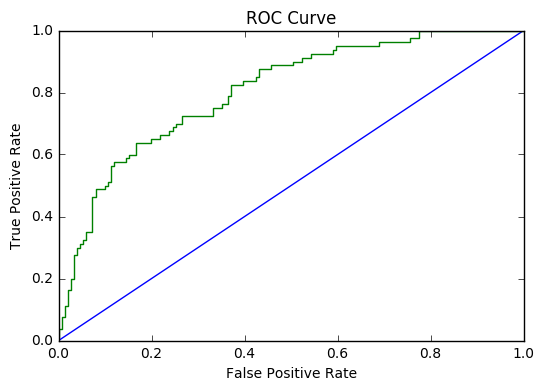

In [6]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


This ROC curve provides a nice visual way to assess classifier's performance

## AUC computation

In [7]:
# Compute and print AUC score
print('AUC : {}'.format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print('AUC scores computed using 5-Fold Cross Validation : {}'.format(cv_auc))

AUC : 0.8059602649006623
AUC scores computed using 5-Fold Cross Validation : [ 0.7987037   0.80777778  0.81962963  0.86622642  0.85113208]


## Hyperparameter tuning with GridSearchCV on Logistic Regression Model

In [39]:
# Again define the Target and Feature Variables 
y = diabetes['diabetes']
x = diabetes.drop('diabetes',axis=1)

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print('Tuned Logistic Regression Parameters : {}'.format(logreg_cv.best_params_))
print('Best Score is : {}'.format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters : {'C': 268.26957952797272}
Best Score is : 0.7721354166666666


## Hold-out set in practice

In [50]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261
